In [1]:
import numpy as np
import copy
import pickle
import os
import matplotlib.pyplot as plt
import random
import networkx as nx

# Input Settings

In [5]:
## 初始化
seed = 19931028
size = [250,250]
p = 0.48            # 社团内部连接概率
q = 0.32            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [6]:
## 恢复情况0.5

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [500,500]
p = 0.331            # 社团内部连接概率
q = 0.221            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [442]:
## modularity c=0.99
seed = 19931028
size = [333,333,334]
p = 0.99            # 社团内部连接概率
q = 0.01            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [344]:
## K = 3，恢复情况0.5

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [300,300,300]
p = 0.331            # 社团内部连接概率
q = 0.221            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [9]:
## K = 3，恢复情况大于0.5

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [300,300,300]
p = 0.34            # 社团内部连接概率
q = 0.22            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [2]:
## K = 3，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [300,300,300]
p = 0.60            # 社团内部连接概率
q = 0.30            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [11]:
## K = 4，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [200,300,400,500]
p = 0.40            # 社团内部连接概率
q = 0.10            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [12]:
## K = 3，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [33,33,34]
p = 0.40            # 社团内部连接概率
q = 0.10            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 1.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [13]:
## K = 3，完全恢复

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [22,33,45]
p = 0.40            # 社团内部连接概率
q = 0.10            # 社团之间连接概率
niter = 10
vsteps = 100
trial = 1
beta1 = 2.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [434]:
## K = 4，完全恢复，非平衡网络

'''
n * (np.sqrt(p)-np.sqrt(q))**2 / np.log(n) = 1.6
n * q / np.log(n) = 32 
'''

seed = 19931028
size = [250,250,250,250]
niter = 10
vsteps = 100
trial = 1
beta1 = 2.0
beta2 = 1.0
xi = 1.0
repeat = 1
knowp = True

In [435]:
Pstar_unbal = np.array([[0.5 , 0.29, 0.35, 0.25],
       [0.29, 0.45, 0.25, 0.3 ],
       [0.35, 0.25, 0.5 , 0.35],
       [0.25, 0.3 , 0.35, 0.45]])

# Initialization

In [3]:
R = np.diag(size)
K = R.shape[0]
n = np.sum(R)
c = np.repeat(np.arange(K), np.sum(R, axis=0))

In [4]:
## 连接概率矩阵
Pstar = q * np.ones([K, K]) + np.diag((p - q) * np.ones(K))
Pstar

array([[0.6, 0.3, 0.3],
       [0.3, 0.6, 0.3],
       [0.3, 0.3, 0.6]])

In [437]:
## unbalanced network
Pstar = Pstar_unbal
Pstar

array([[0.5 , 0.29, 0.35, 0.25],
       [0.29, 0.45, 0.25, 0.3 ],
       [0.35, 0.25, 0.5 , 0.35],
       [0.25, 0.3 , 0.35, 0.45]])

In [5]:
## modularity模块度计算
def Q(adjacency_matrix, cluster): 
    #总边数
    m =sum(sum(adjacency_matrix))/2       #总边数
    k1 = np.sum(adjacency_matrix,axis=1)  #各个点的边数
    k2 = k1.reshape(k1.shape[0],1)        #将列表拆分成每个数一个列表
    #节点度数积
    k1k2 = k1*k2
    #任意两点连接边数的期望值
    Eij = k1k2/(2*m)
    #节点v和w的实际边数与随机网络下边数期望之差
    B = adjacency_matrix - Eij
    #获取节点、社区矩阵
    node_cluster = np.dot(cluster,np.transpose(cluster))
    results = np.dot(B,node_cluster)
    #求和
    sum_results = np.trace(results)
    #模块度计算
    Q = sum_results / (2 * m)
    print("Q:",Q)
    return Q

In [6]:
## 将组标签扩展，得到节点数*组数的矩阵，每行代表一个节点，第几个位置为1即分为第几组
## 返回结果：每个节点都是一个数组，属于的组为1，其余为0
def Zform(e, K):
    n = len(e)  #e是节点的分组列表community assgnment，n即为网络大小，共n个节点
    Ze = np.zeros((n, K))  #生成n*K的0矩阵（初始矩阵）
    Ze[np.arange(n), e] = 1  #对每个节点（每行）打标签
    return Ze

In [7]:
## 根据连边概率生成邻接矩阵A
def genA():
    Zc = Zform(c, K)  #输入c和组数K，得到扩展的分组矩阵
    Omega = np.matmul(np.matmul(Zc, Pstar), np.transpose(Zc))  #Pstar为转移矩阵（p和q未知的情况下，非平衡sbm）
    A = np.random.binomial(1, Omega)  #二项分布中采样1个数，Omega为取“正”的概率
    tmp = np.triu(A) - np.diag(np.diag(A))  #A的右上三角阵减去A的特征值
    A = tmp + np.transpose(tmp)
    return A

In [8]:
A = genA()

In [10]:
A

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
## 任取一个点，将其移动到别的组，返回值为各个节点的组序号（更新后），被更新的节点标签，被更新的节点原始组，被更新的节点新组
def updateK(e, K):
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    setfull = list(range(K))  #制作一个组数K的list，setfull包含所有可能的组标签
    ind = np.random.randint(n)  #在newe中抽取一个数
    b = newe[ind]  #找到随机数在newe中的位置
    
    del setfull[newe[ind]]  #删除setfull中相应位置
    b_prime = np.random.choice(setfull)  #b'，从组列表中抽取一个其他的编号
    
    
    newe[ind] = b_prime  #更新被抽取点的组标签
    return newe, ind, b, b_prime  #返回

In [12]:
def trace_L(e,b):
    _que=[] # 待抽取列表，按频数保存的相邻的组
    for _i,_b in enumerate(e):
        if _b == b: # 如果是要查的组
            for _j in range(len(A[_i])):
                if A[_i][_j]: # 如果相邻
                    _que.append(e[_j]) #记录相邻点的组标签
    return np.random.choice(_que) #从该组相邻的组中抽取一个组

In [13]:
def updateK_L(e,K, matO, L=1):
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    
    ind = np.random.randint(n)  #在newe中抽取一个数
    b = newe[ind]  # 保存原本的组标签
    
    ## 看周围点的组 并按比例随机抽一个 组
    _b = []  # 保存周围点的组
    for i in range(len(A[ind])):
        if A[ind][i]: # 如果相邻
            _b.append(newe[i])
    b_prime = np.random.choice(_b) #我的回合 抽！
    ## 跳L次组
    for _ in range(L):
        b_prime = random.choices(range(K), weights=matO[b_prime], k=1)[0] #从该组相邻的组中抽取一个组
    
    newe[ind] = b_prime  #更新被抽取点的组标签
    return newe, ind, b, b_prime  #返回

In [14]:
def updateK_MeanField(e):  #updateK_(e, L=0)
    L = 0
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    
    ind = np.random.randint(n)  #在newe中抽取一个数
    b = newe[ind]  # 保存原本的组标签
    
    ## 看周围点的组 并按比例随机抽一个 组
    _b = []  # 保存周围点的组
    for i in range(len(A[ind])):
        if A[ind][i]: # 如果相邻
            _b.append(newe[i])
    b_prime = np.random.choice(_b) #我的回合 抽！
    ## 跳L次组
    for _ in range(L):
        b_prime = trace_L(newe,b_prime)
    
    newe[ind] = b_prime  #更新被抽取点的组标签
    return newe, ind, b, b_prime  #返回

In [15]:
def updateK_Wolff(e): # Wolff_1
    newe = copy.deepcopy(e)  # 确保多维列表复制成功
    n = len(newe)  # newe的长度
    
    ind = np.random.randint(n)  # 在newe中抽取一个数
    b = newe[ind] # 保存原本的组标签
    ## 看周围点的组 保存所有同组的节点 和 相邻点的组
    _ind = set([ind])
    _b = []  # 按组出现频率保存组标签
    for i in range(len(A[ind])):
        if A[ind][i]: # 如果相邻
            if newe[ind]==newe[i]: # 如果同组 记录一下 到时候一起变
                _ind.add(i)
            _b.append(newe[i]) # 记录组出现频率
            
    b_prime = np.random.choice(_b) # 我的回合 抽！
    for i in _ind:
        newe[i]=b_prime
    
    return newe, list(_ind), b, b_prime  #返回

In [16]:
## 任取多个点，将其移动到别的组，返回值为各个节点的组序号（更新后），被更新的节点标签，被更新的节点原始组，被更新的节点新组
def updateK_multi(e, K, step_len):
    newe = copy.deepcopy(e)  #确保多维列表复制成功
    n = len(newe)  #newe的长度
    ind_list = np.random.randint(0, n, step_len)  #在newe中抽取step_len个数，ind_list是每个数的位置
    b_list = newe[ind_list]  #找到随机数在newe中的位置
    b_prime_list = []
    for i in range(step_len):
        setfull = list(range(K))  #制作一个组数K的list，setfull包含所有可能的组标签
        del setfull[newe[ind_list[i]]]  #删除setfull中相应位置
        b_prime = np.random.choice(setfull)
        b_prime_list.append(b_prime)  #b'，从组列表中抽取一个其他的编号
        newe[ind_list[i]] = b_prime  #更新被抽取点的组标签
    return newe, ind_list, b_list, b_prime_list  #返回

In [17]:
## 更新移动后的扩展矩阵
def updateZe(Ze, ind, b, b_prime):
    newZe = copy.deepcopy(Ze)
    newZe[ind, b] = Ze[ind, b] - 1
    newZe[ind, b_prime] = Ze[ind, b_prime] + 1
    return newZe

In [18]:
## 更新移动后的扩展矩阵（多点同时移动）
def updateZe_multi(Ze, ind_list, b_list, b_prime_list):
    newZe = copy.deepcopy(Ze)
    newZe[ind_list, b_list] = Ze[ind_list, b_list] - 1
    newZe[ind_list, b_prime_list] = Ze[ind_list, b_prime_list] + 1
    return newZe

In [19]:
## 误差矩阵（混淆矩阵），Ze是扰乱后的扩展组标签，Zc是原本的扩展组标签，得到的矩阵为扰动前后判断矩阵
def Rdiff(e, c):
    K = np.max(c) + 1
    Ze = Zform(e, K)  #扰乱后的扩展组标签
    Zc = Zform(c, K)  #原本的扩展组标签
    R = np.matmul(np.transpose(Ze), Zc).astype(int)  #原本1，扰动后1；原本2，扰动后1；原本1，扰动后2；原本2，扰动后2
    return R

In [20]:
## 根据节点移动情况更新网络连边情况
def updateMat(matO, matN, ind, b, b_prime, Ze):
    A_ind = A[ind, ].reshape((-1, 1))                    #被选取点的连边情况
    tmp = (A_ind * Ze).sum(axis=0)  # dim: k             #和每块的连边数量
    new_matO = matO.copy()
    new_matO[b, :] = new_matO[b, :] - tmp                #第b个点（移动点）所在的组减去第b个点的连边情况
    new_matO[b_prime, :] = new_matO[b_prime, :] + tmp    #移动到组b_prime后的连边情况
    new_matO[:, b] = new_matO[:, b] - tmp                #对称更新
    new_matO[:, b_prime] = new_matO[:, b_prime] + tmp    #对称更新

    new_matN = matN.copy()
    nZe = Ze.sum(axis=0)
    new_matN[b, :] = new_matN[b, :] - nZe
    new_matN[b_prime, :] = new_matN[b_prime, :] + nZe
    new_matN[:, b] = new_matN[:, b] - nZe
    new_matN[:, b_prime] = new_matN[:, b_prime] + nZe
    new_matN[b, b] = new_matN[b, b] + 1 + 1
    # new_matN[b_prime, b_prime] = new_matN[b_prime, b_prime] + 1 - 1
    new_matN[b_prime, b] = new_matN[b_prime, b] - 1
    new_matN[b, b_prime] = new_matN[b, b_prime] - 1
    return new_matO, new_matN

In [21]:
def updateMat_multi(newZe):
    new_matO = np.matmul(np.matmul(np.transpose(newZe), A), newZe)
    new_matN = np.matmul(np.matmul(np.transpose(newZe), np.ones([n, n])), newZe) - np.diag(np.sum(newZe, axis=0))
    return new_matO, new_matN

In [22]:
## 后验分布计算方法
def loggam_apprx(x):
    tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)
    return tmp

In [23]:
## 对数后验分布的快速计算，输入为连边数，可能出现的最大连边数
def logpostpdf_fast(matO, matN):
    matY = matN - matO
    p = np.sum(
        loggam_apprx(matO + beta1 - 1) +
        loggam_apprx(matY + beta2 - 1) -
        loggam_apprx(matN + beta1 + beta2 - 2)
    ) / 2
    return p

In [24]:
## 新的对数后验分布计算方法
def logpostpdf_fast2(matO, matN):
    matY = matN - matO
    connect_in = np.sum(np.diag(matO)) / 2
    connect_be = np.sum(matO) / 2 - connect_in
    disconnect_in = np.sum(np.diag(matY)) / 2
    disconnect_be = np.sum(matY) / 2 - disconnect_in
    tmp = np.log(p) * connect_in + np.log(1-p) * disconnect_in + np.log(q) * connect_be + np.log(1-q) * disconnect_be
    return tmp

In [25]:
def network_permutation(e, correct_number):
    n = np.size(e)
    e = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    e[ind[:correct_number]] = c[ind[:correct_number]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e[ind[correct_number:]] = np.random.randint(K, size=(n-correct_number))  #选取剩余点，随机变为可能的值（放进任意组），可能正确
    #alginitR = Rdiff(e0, c)  #更新错误矩阵
    return e

In [54]:
def RIindex(e0, true_label):
    a = b = c = d = 0
    for i in range(len(e0)):
        for j in range(i, len(e0)):
            if e0[i] == e0[j]:
                if true_label[i] == true_label[j]:
                    a += 1
                else:
                    c += 1
            else:
                if true_label[i] == true_label[j]:
                    d += 1
                else:
                    b += 1
    RI = (a + b) / (a + b + c + d)
    return RI

In [1]:
## 对于某一次特定恢复进行收敛性分析
def autocorrelation_time(logpost_list, tau):
    Rtau_list = []
    T = niter
    scale_para = T - tau
    logpost_avg = np.mean(logpost_list)
    logpost_std = np.std(logpost_list)
    logpost_sigma = logpost_std ** 2
    Rtau = 0
    for i in range(1, len(logpost_list) - tau):
        Rtau += (logpost_list[i] - logpost_avg) * (logpost_list[i+tau] - logpost_avg) / scale_para / logpost_sigma
        Rtau_list.append(Rtau)
    return Rtau_list

# MCMC Algorithm

In [26]:
def classic_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        # new_e, ind, b, b_prime = updateK_L(curr_e, 0)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

In [27]:
def MeanField_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        # newe = updateK(currente, self.K)
        # new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

In [331]:
def DoubleJump_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        # newe = updateK(currente, self.K)
        # new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        new_e, ind, b, b_prime = updateK_L(curr_e, K, curr_matO)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

In [118]:
def Wolff_MHsampler(e0=None, niter=None, knowp=False, vsteps=100):
    '''
    Args:
        e0: init
        niter: total # of iterations
        K: # of class
        beta1, beta2: hyper-param
        A: adjacency matrix
        xi: temperature
        c: true label assignment
    '''


    # 打乱
    curr_e = copy.deepcopy(e0)  #深复制一个打乱后的标签
    curr_Ze = Zform(curr_e, K)  #创建打乱后的扩展组标签
    curr_matO = np.matmul(
        np.matmul(np.transpose(curr_Ze), A), curr_Ze)
    curr_matN = np.matmul(
        np.matmul(
            np.transpose(curr_Ze), np.ones([n, n])), curr_Ze
    ) - np.diag(np.sum(curr_Ze, axis=0))

    # 储存当前（打乱后的）后验分布
    logPost = []
    logPost.append(logpostpdf_fast(curr_matO, curr_matN))
    # logPost.append(self.logpostpdf(e0, knowp))
    n_mis = []

    # 开始循环
    for i in np.arange(1, niter):
        # newe = updateK(currente, self.K)
        # new_e, ind, b, b_prime = updateK(curr_e, K)  #任取一个点，将其移动到别的组，返回新的标签，被移动点，移动前后的组号
        new_e, ind, b, b_prime = updateK_Wolff(curr_e)
        new_Ze = updateZe(curr_Ze, ind, b, b_prime)  #更新扩展组标签Ze
        new_matO, new_matN = updateMat(              #更新网络的连边数量
             curr_matO, curr_matN, ind, b, b_prime, curr_Ze)
        
        # new_e, ind, b, b_prime = updateK_MeanField(curr_e)
        # new_Ze =  updateZe_multi(curr_Ze, ind, [b for i in ind],[ b_prime for i in ind])  #更新扩展组标签Ze
        # new_matO, new_matN = updateMat_multi(new_Ze)
        
        # logNew = self.logpostpdf(newe, knowp)
        logNew = logpostpdf_fast(new_matO, new_matN)  #节点移动后的对数后验分布
        logdiff = logNew - logPost[i - 1]                  #计算新的后验分布与前一次后验分布的差值
        tmp = np.random.uniform(0, 1)                      #选取随机数

        # 判断是否接受这次移动，保存当前组标签和对数后验分不
        if tmp < np.exp(xi * logdiff):
            curr_e, curr_Ze = new_e, new_Ze
            curr_matO, curr_matN = new_matO, new_matN
            logPost.append(logNew)

        else:
            logPost.append(logPost[i - 1])

        # if i % vsteps == 0:
        #     R = Rdiff(currente, self.c)
        #     mist = np.sum(R - np.diag(np.diag(R)))
        #     print("iteration: {}, mistake: {}".format(i, mist))
        #     if self.show:
        #         print(R)
        #     n_mis.append(mist)


    logPost = logPost
    label = curr_e
    n_mis = n_mis
    finalR = Rdiff(curr_e, c)
    return logPost, label, n_mis, finalR

# Main

In [28]:
niter = niter * n
niter

9000

classic_MHsampler

In [29]:
test_num = 1
dirmake = "./K" + str(K) + "n" + str(n) + str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

In [61]:
repeat = 2

In [63]:
## main for classic_MHsampler
for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 1
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))

        res = classic_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
    finale = e0
    RI = RIindex(finale, c)
    #print("RI =", RI)
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[ 95  99 100]
 [103  97 103]
 [102 104  97]]
initial mistake is 611
initial mistake is 596
initial mistake is 600
initial mistake is 600
RI = 1.0
initial alginitR:  [[105  99  98]
 [ 95  96  96]
 [100 105 106]]
initial mistake is 593
initial mistake is 598
initial mistake is 899
initial mistake is 900
RI = 1.0


In [35]:
c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [36]:
finale

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [37]:
finalR

array([[  0, 300,   0],
       [300,   0,   0],
       [  0,   0, 300]])

In [55]:
RIindex(finale, c)

1.0

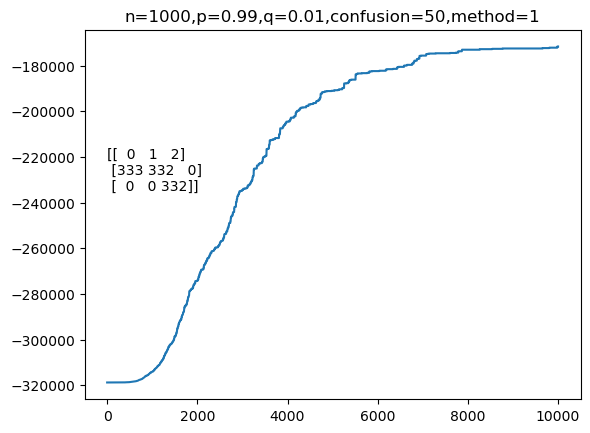

In [388]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'method=1'
plt.title(fig_name)
plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

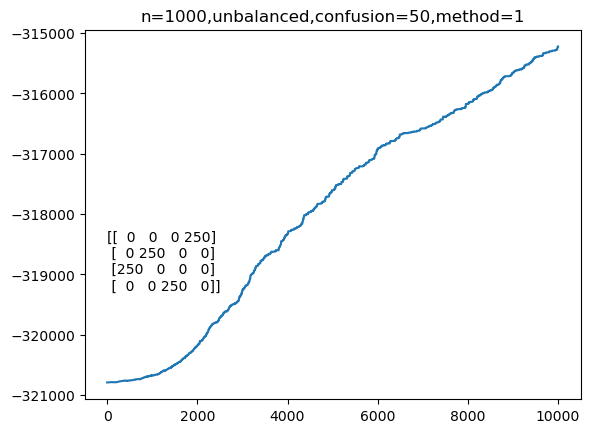

In [433]:
## 非均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' +  'unbalanced' + ',' + 'method=1'
plt.title(fig_name)
plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

MeanField_MHsampler

In [6]:
test_num = 2
dirmake = "./K" + str(K) + "n" + str(n) + str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

NameError: name 'K' is not defined

In [450]:
## main for MeanField_MHsampler
for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 50
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))

        res = MeanField_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[122 105  99]
 [106 129 105]
 [105  99 130]]
initial mistake is 619


<ipython-input-122-2a5b458da71c>:49: RuntimeWarning: overflow encountered in exp
  if tmp < np.exp(xi * logdiff):
<ipython-input-21-5d905e2dfbce>:3: RuntimeWarning: invalid value encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)
<ipython-input-21-5d905e2dfbce>:3: RuntimeWarning: divide by zero encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)


initial mistake is 388
initial mistake is 356
initial mistake is 345


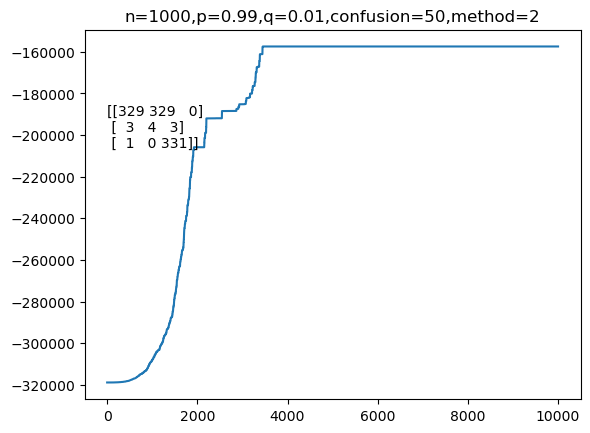

In [451]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'method=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-8000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

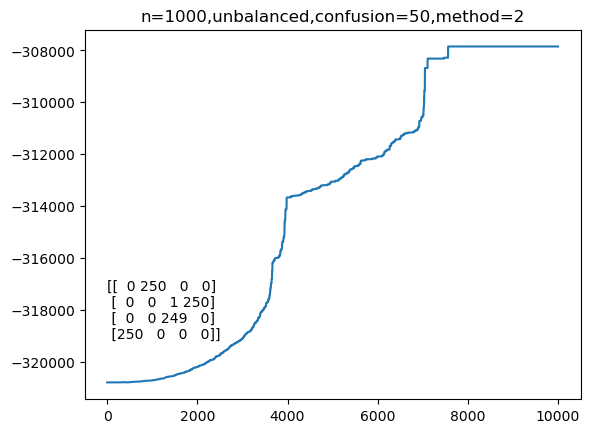

In [441]:
## 非均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'unbalanced' + ',' + 'confusion='+str(halfn)+',' + 'method=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-7000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

DoubleJump_MHsampler

In [407]:
test_num = 3_3
dirmake = "./K" + str(K) + "n" + str(n) + str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

In [376]:
## main for DoubleJump_MHsampler
for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 50
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))

        res = DoubleJump_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[80 66 61 62]
 [53 71 50 62]
 [59 57 76 58]
 [58 56 63 68]]
initial mistake is 705


<ipython-input-21-5d905e2dfbce>:3: RuntimeWarning: invalid value encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)
<ipython-input-21-5d905e2dfbce>:3: RuntimeWarning: divide by zero encountered in log
  tmp = (x + 1 / 2) * np.log(x) - x + 1 / 2 * np.log(2 * np.pi)


initial mistake is 731
initial mistake is 707
initial mistake is 744


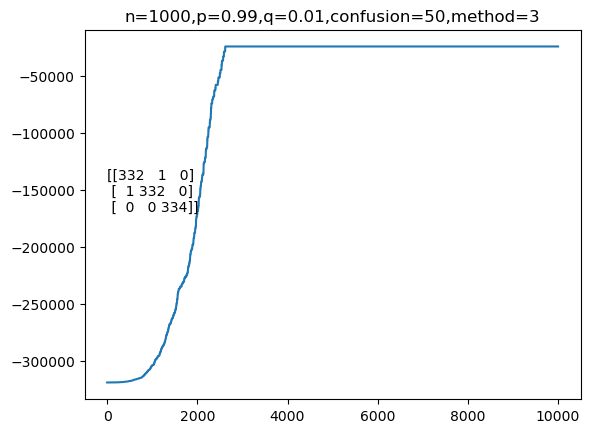

In [412]:
## 均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q) + ',' + 'method=3'
plt.title(fig_name)
plt.text(4,logPostList[0][-8000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

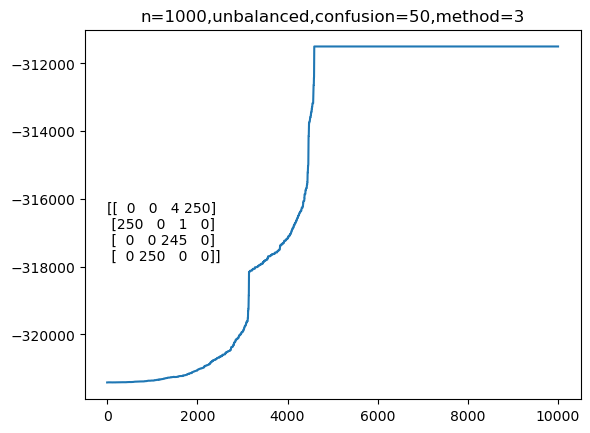

In [378]:
## 非均匀网络绘图
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'unbalanced' + ',' + 'method=3'
plt.title(fig_name)
plt.text(4,logPostList[0][-6500], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [68]:
finalR

array([[300,   0,   0],
       [  0, 300,   0],
       [  0,   0, 300]])

Wolff_MHsampler

In [168]:
test_num = 4_1
dirmake = "./K" + str(K) + "n" + str(n) + "xi" + str(xi) + "_exp" + str(trial) + str(test_num) + "/"
if not os.path.exists(dirmake):
    os.makedirs(dirmake)

In [169]:
## main for Wolff_MHsampler
for repeat_mark in range(repeat):
    e0 = np.zeros((n,)).astype(int)  #生成n*n的0矩阵
    ind = np.random.permutation(n)  #乱序后的n
    #halfn = int(n / 2)  # half wrong
    halfn = 50
    e0[ind[:halfn]] = c[ind[:halfn]]  #选取部分点，变为c中对应位置的值，此部分为正确的值
    e0[ind[halfn:]] = np.random.randint(K, size=(n-halfn))  #选取剩余点，随机变为可能的值（放进任意组），此部分为随机摆放，可能正确
    alginitR = Rdiff(e0, c)  #更新错误矩阵
    print("initial alginitR: ", alginitR)

    logPostList = []
    misList = []
    # labelList = []
    count = 1
    RList = []
    initR = alginitR

    while np.sum(initR - np.diag(np.diag(initR))) > 0 and count < 5:
        initR = Rdiff(e0, c)
        print("initial mistake is {}".format(
            np.sum(initR - np.diag(np.diag(initR)))))

        res = Wolff_MHsampler(e0, niter, knowp, vsteps)
        e0 = res[1]
        logPostList.append(res[0])
        misList.append(res[2])
        RList.append(res[3])
        count = count + 1
    finalR = Rdiff(e0, c)
    mist = np.sum(finalR - np.diag(np.diag(finalR)))

    with open(dirmake + "input_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [K, n, niter, Pstar, alginitR], out)

    # save_figs
    with open(dirmake + "output_repeat" + str(repeat_mark) + ".pkl", "wb") as out:
        pickle.dump(
            [logPostList, mist, RList], out)

initial alginitR:  [[107  93  95]
 [ 93  96 100]
 [100 111 105]]
initial mistake is 592


ValueError: operands could not be broadcast together with shapes (99900,1) (900,3) 

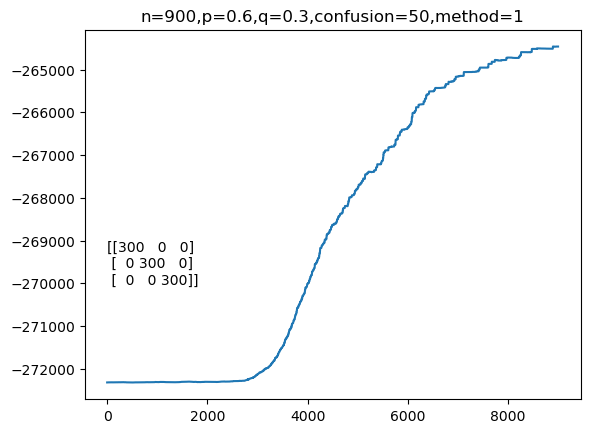

In [41]:
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'method=4'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=100,bbox_inches = 'tight')
plt.show()

In [34]:
logPostList[0]

[-2473.4495006668008,
 -2473.4495006668008,
 -2473.4645898933118,
 -2470.152353184065,
 -2469.497238726679,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2458.5565343775634,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.87804

[-2473.4495006668008,
 -2473.4495006668008,
 -2473.4645898933118,
 -2470.152353184065,
 -2469.497238726679,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.643766358772,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.733943910122,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2465.3205949124863,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2463.1101484847654,
 -2458.5565343775634,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.8780479935267,
 -2453.87804

In [ ]:
data_output[0][0]

In [ ]:
x = range(len(data_output[0][0]))
y = data_output[0][0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
## c=0.99
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y)
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'post=1'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q) + 'confusion='+str(halfn)+',' + 'post=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
logPostList[0][-1]

In [ ]:
fig = plt.figure()
x = range(len(logPostList[0]))
y = logPostList[0]
#plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
fig_name = 'n='+str(n)+',' + 'p='+str(p)+',' + 'q='+str(q)+',' + 'confusion='+str(halfn)+',' + 'post=2'
plt.title(fig_name)
plt.text(4,logPostList[0][-5000], str(finalR))
plt.plot(x, y)
save_file = "E:/学习/研三/Code/test1" + "/" + fig_name + ".jpg"
plt.savefig(save_file, dpi=300,bbox_inches = 'tight')
plt.show()